# Applying the Toothache example to the pgmpy package

In [1]:
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD
from pgmpy.independencies import Independencies
from pgmpy.models import BayesianModel
import networkx as nx
import pylab as plt

/Users/matthias/.pyenv/versions/3.9.9/envs/machine-env/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Input the full joint distribution

In [2]:
p = JPD(['Toothache', 'Cavity', 'Catch'], [2,2,2],
         [0.576, #!T !V, !C
          0.144, #!T !V, C
          0.008, #!T V, !C
          0.072, #!T V, C
          0.064, #T !V, !C
          0.016, #T !V, C
          0.012, #T V, !C
          0.108, #T V, C
         ])

## Check for cond. independence

In [3]:
p.check_independence(['Toothache'], ['Cavity'])
p.check_independence(['Toothache'], ['Catch'])
is_tc_v = p.check_independence(['Toothache'], ['Catch'], ('Cavity', ), condition_random_variable=True)
is_vc_t = p.check_independence(['Cavity'], ['Catch'], ('Toothache', ), condition_random_variable=True)
is_tv_c = p.check_independence(['Toothache'], ['Cavity'], ('Catch', ), condition_random_variable=True)

print('%s is independent of %s given %s: %s' % ('Toothache', 'Catch', 'Cavity', is_tc_v))
print('%s is independent of %s given %s: %s' % ('Cavity', 'Catch', 'Toothache', is_vc_t))
print('%s is independent of %s given %s: %s' % ('Toothache', 'Cavity', 'Catch', is_tv_c))

Toothache is independent of Catch given Cavity: True
Cavity is independent of Catch given Toothache: False
Toothache is independent of Cavity given Catch: False


# Alternative search for conditional independence(s)

In [4]:
x = p.get_independencies()
print('Any statistical indepndences?')
# if nothing is printed, then there none of the variables are statistically indep. from one another.
if x == Independencies():
    print('None')
else:
    print('Yes:', x)
# This following method actually checks if conditioniing onsome variables 
# is equal to the product of the marginals conditioned on the same variable
cond_on = p.get_independencies(condition=[('Cavity',1),])
print('Conditional independencies given Cavity?', cond_on)
cond_on = p.get_independencies(condition=[('Toothache',0),])
print('Conditional independencies given Toothache?', [cond_on, 'None'][cond_on==Independencies()])
cond_on = p.get_independencies(condition=[('Catch',0),])
print('Conditional independencies given Catch?', [cond_on, 'None'][cond_on==Independencies()])

Any statistical indepndences?
None
Conditional independencies given Cavity? (Toothache ⟂ Catch)
Conditional independencies given Toothache? None
Conditional independencies given Catch? None


/Users/matthias/.pyenv/versions/3.9.9/envs/machine-env/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


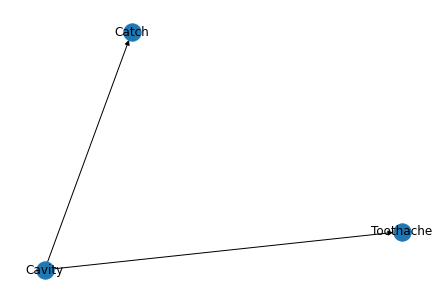

In [5]:
def drawDAG(joint_distr):
    pairs = [(a,b) for b in p.variables for a in p.variables if a != b]
    edges = set()
    for a, b in pairs:
        is_dep = joint_distr.check_independence([a], [b])
        if not is_dep:
            edges.add((a,b))
    edges2 = set()
    for a, b in edges:
        for c in p.variables:
            if c not in (a,b):
                is_cond_indep = joint_distr.check_independence([a], [b], (c,), condition_random_variable=True)
#                 print(a,b,c, is_cond_indep)
                if is_cond_indep:
                    edges2.add((c, a))
                    edges2.add((c, b))
    model = BayesianModel(edges2)
    for v in p.variables:
        if not any(v in e for e in edges2):
            model.add_node(v)
    nx.draw(model, with_labels=True)
    plt.show()
drawDAG(p)

# Add weather

add a weather variable to the full joint distribution then verify that weather is statistically independent from the other 3 variables

Statistical independencies:
(Weather ⟂ Toothache)
(Weather ⟂ Cavity)
(Weather ⟂ Catch)


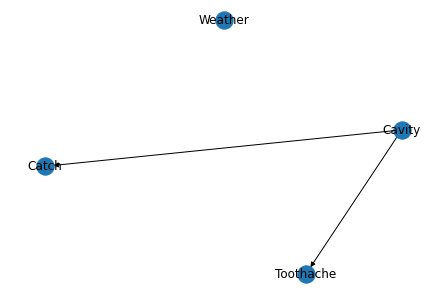

In [6]:
p = JPD(['Weather', 'Toothache', 'Cavity', 'Catch'], [4,2,2,2],
         [#W rainy: 
          0.576*0.6, #!T !V, !C
          0.144*0.6, #!T !V, C
          0.008*0.6, #!T V, !C
          0.072*0.6, #!T V, C
          0.064*0.6, #T !V, !C
          0.016*0.6, #T !V, C
          0.012*0.6, #T V, !C
          0.108*0.6, #T V, C
        #W sunny:
          0.576*0.2, #!T !V, !C
          0.144*0.2, #!T !V, C
          0.008*0.2, #!T V, !C
          0.072*0.2, #!T V, C
          0.064*0.2, #T !V, !C
          0.016*0.2, #T !V, C
          0.012*0.2, #T V, !C
          0.108*0.2, #T V, C
        #W cloudy:
          0.576*0.1, #!T !V, !C
          0.144*0.1, #!T !V, C
          0.008*0.1, #!T V, !C
          0.072*0.1, #!T V, C
          0.064*0.1, #T !V, !C
          0.016*0.1, #T !V, C
          0.012*0.1, #T V, !C
          0.108*0.1, #T V, C
        #W snow:
          0.576*0.1, #!T !V, !C
          0.144*0.1, #!T !V, C
          0.008*0.1, #!T V, !C
          0.072*0.1, #!T V, C
          0.064*0.1, #T !V, !C
          0.016*0.1, #T !V, C
          0.012*0.1, #T V, !C
          0.108*0.1, #T V, C
         ])
print("Statistical independencies:")
print(p.get_independencies())
drawDAG(p)